In [444]:
%run ../init.py
prov = pd.read_pickle('../dataframes/mydata_dpc_ita_province.p')
ita = pd.read_pickle('../dataframes/mydata_dpc_ita.p')

lastday = prov.date.iat[-1]
print('Dati aggiornati a:', lastday)

# Utility functions ###############
def sorted_set_prov(df, province, var):
    '''Ordina set rispetto alla variabile var'''
    df = df[df.provincia.isin(province)][df.date==lastday].sort_values(var, ascending=False)
    sortedset = df.provincia.unique()
    return sortedset

cs = {
    'Enna': 'tab:green',
    'Palermo': 'tab:pink',
    'Catania': 'tab:blue',
    'Siracusa': 'tab:cyan',
    'Messina': 'r',
    'Trapani': 'firebrick',
    'Caltanissetta': 'orange',
    'Agrigento': 'tab:olive',
    'Ragusa': 'tab:purple',
    'Sicilia': 'k'
}

Current time: 2020-04-13 20:13:11.311412
Dati aggiornati a: 2020-04-13 17:00:00


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


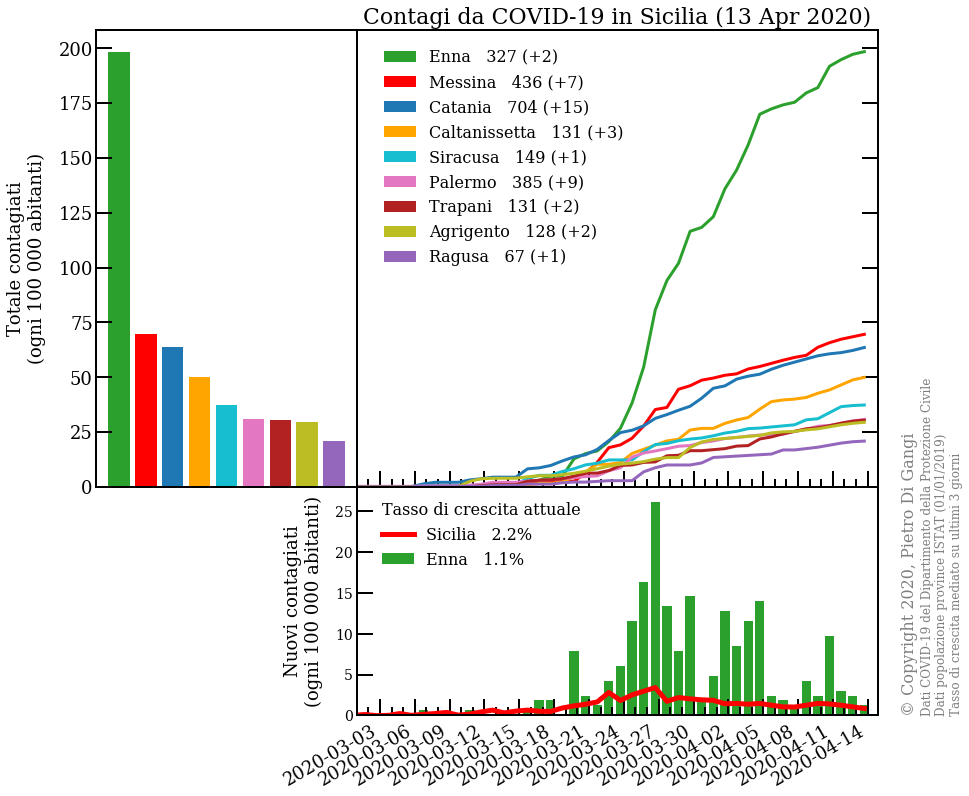

In [445]:
newcasesmax = 28

fig = plt.figure(figsize=(14,14))
grid = plt.GridSpec(3, 3, hspace=0., wspace=0.)
ax = fig.add_subplot(grid[:-1, 1:])
y_ax = fig.add_subplot(grid[:-1, 0], xticks=[], sharey=ax)
x_ax = fig.add_subplot(grid[-1, 1:], sharex=ax)
x_ax.tick_params(axis='y', which='major', labelsize=14)
ax.tick_params(left=False, labelleft=False, right=True) 

province = prov[prov.region=='Sicilia'].provincia.unique()
province = sorted_set_prov(prov,province,'cases_per100k')

for provincia in province:
    df = prov[prov['provincia']==provincia]
    pop = df['population'].iat[0]
    tot = df.cases.iat[-1]
    new = df.new_cases.iat[-1]
    ax.plot(df.date, df.cases_per100k, color=cs[provincia], lw=3, ls='-', label=provincia)
    lb = '   %d (+%d)' % (tot, new)
    y_ax.bar(provincia, df['cases_per100k'].iat[-1], color=cs[provincia], label=provincia+lb)
    
    if provincia=='Enna':
        x_ax.bar(df.date, df.new_cases_per100k, color=cs[provincia], label='Enna   %.1f%s' % (df.cases_delta3.iat[-1]*100,'%'))
        
# Sicilia
df = ita[ita['region']=='Sicilia']
k = df.cases_delta3.iat[-1]
tot_sic = df.cases.iat[-1]
pop_sic = df['population'].iat[0]
#ax.text(datetime.date(2020, 3, 5)+timedelta(days=3), 0.8*maxy, 'SICILIA\nCasi totali: %d (+%.f)\n1 contagiato su %.f\nTasso di crescita: %.1f%s' % (tot_sic, df.new_cases.iat[-1], pop_sic/tot_sic, k*100, '%'), fontsize=22, backgroundcolor='white')
x_ax.plot(df.date, df.new_cases_per100k, color='r', lw=5, label='Sicilia   %.1f%s' % (df.cases_delta3.iat[-1]*100,'%'))

# main axes
ax.set_xlim([datetime.date(2020, 3, 1), today+timedelta(days=1)])

#bottom panel
x_ax.set_ylim(0,newcasesmax)
x_ax.set_ylabel('Nuovi contagiati\n(ogni 100 000 abitanti)')
x_ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
x_ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
x_ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.gcf().autofmt_xdate()
x_leg = x_ax.legend(loc='upper left', bbox_to_anchor=(0.02,1), title='Tasso di crescita attuale', title_fontsize=16, frameon=False)
x_leg._legend_box.align = "left"

# left panel
#y_ax.set_ylim(0,casesmax)
y_ax.set_ylabel('Totale contagiati\n(ogni 100 000 abitanti)')
y_leg = y_ax.legend(frameon=False, bbox_to_anchor=(1.05,0.99))
y_leg._legend_box.align = "left"

# plot title
ax.set_title('Contagi da COVID-19 in Sicilia (%s)' % lastday.strftime('%-d %b %Y'), fontsize=22)

# disclaimer
dayspan = prov.date.iat[-1] - prov.date.iat[0]
text = '© Copyright 2020, Pietro Di Gangi'
x_ax.text(lastday+0.065*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=16)
text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
x_ax.text(lastday+0.100*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
text = 'Dati popolazione province ISTAT (01/01/2019)'
x_ax.text(lastday+0.125*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
text = 'Tasso di crescita mediato su ultimi 3 giorni'
x_ax.text(lastday+0.150*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)

plt.show()

fig.savefig('figure/%s-covid19-sicilia-contagi-evoluzione.png' % lastday.strftime('%Y-%m-%d'))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


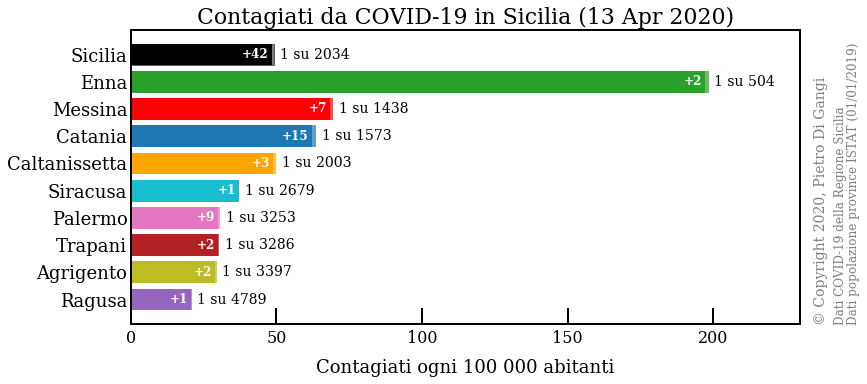

In [446]:
def standing_normalized(province, region_header, var, title='', xlabel='x', xmax=100):

    n = len(province)*0.1
    
    fig = plt.figure(figsize=(12,6*n))
    ax = fig.add_subplot(111)
    ax.tick_params(left=False) 
    province = sorted_set_prov(prov, province, 'cases_per100k')
    province = province[::-1]
    
    for i,provincia in enumerate(province):
        df = prov[prov.provincia==provincia]
        pop = df.population.iat[0]
        tot = df[var].iat[-1]
        ax.barh(provincia, df[var+'_per100k'].iat[-1], color=cs[provincia], label='', alpha=0.7)
        for days in np.arange(1):
            ax.barh(provincia, df[var+'_per100k'].iat[-2-days], color=cs[provincia], label='', alpha=1)
        lb = '1 su %.f' % (pop/tot)
        ax.text(df[var+'_per100k'].iat[-1]+2, provincia, lb, ha='left', va='center', fontsize=14)
        ax.text(df[var+'_per100k'].iat[-2]-1, provincia, ('+%d' % df['new_'+var].iat[-1]), ha='right', va='center', color='w', fontsize=12, weight='bold')

        
    if region_header!=None:
        df = ita[ita.region==region_header]
        tot = df[var].iat[-1]
        pop = df.population.iat[0]
        ax.barh(region_header, df[var+'_per100k'].iat[-1], color='k', label='', edgecolor='k', alpha=0.5)
        ax.barh(region_header, df[var+'_per100k'].iat[-2-days], color='k', label='', alpha=1)
        lb = '1 su %.f' % (pop/tot)
        ax.text(df[var+'_per100k'].iat[-1]+2, region_header, lb, ha='left', va='center', fontsize=14)
        ax.text(df[var+'_per100k'].iat[-2]-1, region_header, ('+%d' % df['new_'+var].iat[-1]), ha='right', va='center', color='w', fontsize=12, weight='bold')
    
    plt.xlabel(xlabel)
    #ax.grid(axis='x', linewidth=2, alpha=0.1, which='major')
    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.set_xlim(0,xmax)
    
    #legend
    plt.title(title+' (%s)' % lastday.strftime('%-d %b %Y'), fontsize=22)
    
    # disclaimer
    text = '© Copyright 2020, Pietro Di Gangi'
    plt.text(xmax+0.02*xmax, -0.95, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
    text = 'Dati COVID-19 della Regione Sicilia'
    plt.text(xmax+0.05*xmax, -0.95, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
    text = 'Dati popolazione province ISTAT (01/01/2019)'
    plt.text(xmax+0.07*xmax, -0.95, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)

    plt.show()
    
    fig.savefig('figure/%s-covid19-sicilia-contagi-normalizzati.png' % lastday.strftime('%Y-%m-%d'))
       
    
regione = 'Sicilia'
province = prov[prov.region==regione].provincia.unique()
standing_normalized(province, regione, 'cases', 'Contagiati da COVID-19 in Sicilia', 'Contagiati ogni 100 000 abitanti', xmax=230)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


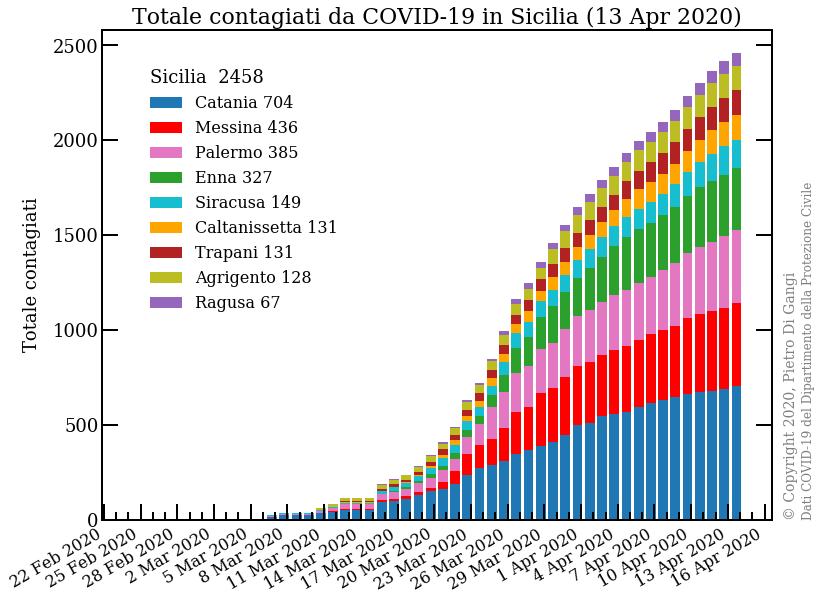

In [447]:
def cumulative_stacked(province, region_header, var, title='', ylabel='y'):

    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.tick_params(right=True)

    df = prov[prov.provincia==province[0]]
    margin_bottom = np.zeros(len(df['date'].drop_duplicates()))
    for i,provincia in enumerate(province):
        df = prov[prov.provincia==provincia]
        tot = df[var].iat[-1]
        lb = '%s %d' % (provincia, tot)

        values = np.array(df[var])
        ax.bar(df.date, df[var], bottom=margin_bottom, label=lb, color=cs[provincia])
        margin_bottom += values
    
    plt.ylabel(ylabel)
    #ax.grid(axis='y', linewidth=2, alpha=0.1, which='both')
    ax.tick_params(axis='x', which='major', labelsize=16)
    
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b %Y'))
    fig.autofmt_xdate()
    plt.gcf().autofmt_xdate()
    
    #legend
    if region_header!=None:
        df = ita[ita.region==region_header]
        tot = df[var].iat[-1]
        lb = '%s  %d' % (region_header, tot)
    leg = plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(0.05,0.95), fontsize=16, title=lb) 
    leg._legend_box.align = "left"
    plt.title(title + ' (%s)' % lastday.strftime('%-d %b %Y'), fontsize=22)
    
    # disclaimer
    text = '© Copyright 2020, Pietro Di Gangi'
    plt.text(lastday+0.08*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
    text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
    plt.text(lastday+0.11*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
      
    plt.show()
    
    fig.savefig('figure/%s-covid19-sicilia-totalecontagi.png' % lastday.strftime('%Y-%m-%d'))
    
province = sorted_set_prov(prov, province, 'cases')
cumulative_stacked(province, 'Sicilia', 'cases', title='Totale contagiati da COVID-19 in Sicilia', ylabel='Totale contagiati')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


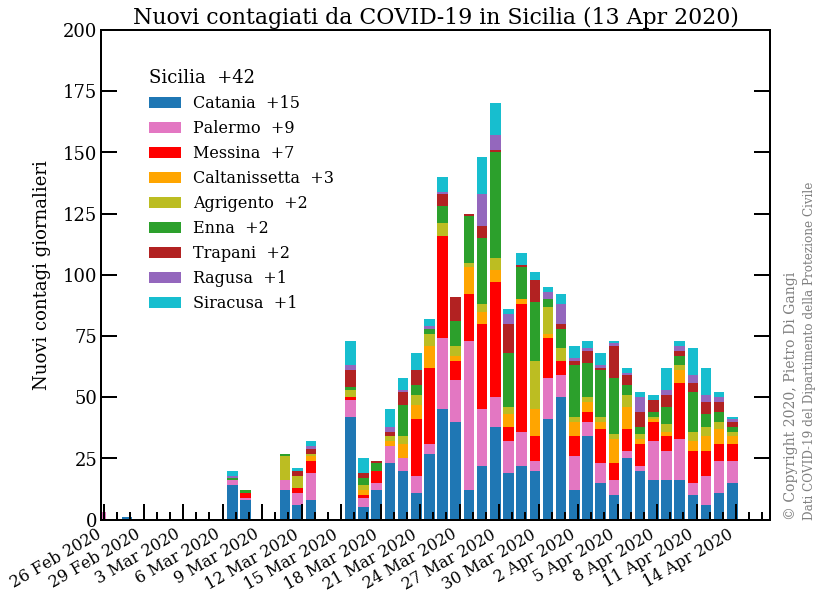

In [448]:
def differential_stacked(province, region_header, var, title='', ylabel='y', ymax=100):
    cumvar = var.replace("new_", "")

    # figure
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.tick_params(right=True)
    
    # selected sets
    N = len(province)    
    
    # plot data
    df = prov[prov.provincia==province[0]]
    margin_bottom = np.zeros(len(df['date'].drop_duplicates()))
    for i,provincia in enumerate(province):
        df = prov[prov.provincia==provincia]
        tot = df[var].iat[-1]
        lb = '%s  +%.f' % (provincia, tot)
        
        values = np.array(df[var])
        ax.bar(df.date, df[var], bottom=margin_bottom, label=lb, color=cs[provincia])
        margin_bottom += values

    # axes settings
    ax.set_xlim(left = df.date.iat[1])
    ax.set_ylim(0,ymax)
    plt.ylabel(ylabel)
    #ax.grid(axis='y', linewidth=2, alpha=0.1, which='both')
    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b %Y'))
    fig.autofmt_xdate()
    plt.gcf().autofmt_xdate()
    
    #legend
    if region_header!=None:
        df = ita[ita.region==region_header]
        tot = df[var].iat[-1]
        lb = '%s  +%d' % (region_header, tot)
    leg = plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(0.05,0.95), fontsize=16, title=lb) 
    leg._legend_box.align = "left"
    plt.title(title + ' (%s)' % lastday.strftime('%-d %b %Y'), fontsize=22)
    
    # disclaimer
    text = '© Copyright 2020, Pietro Di Gangi'
    plt.text(lastday+0.08*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
    text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
    plt.text(lastday+0.11*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
    
    plt.show()
    
    fig.savefig('figure/%s-covid19-sicilia-nuovicontagi.png' % lastday.strftime('%Y-%m-%d'))
    
    
    
province = sorted_set_prov(prov, province, 'new_cases')
differential_stacked(province, regione, 'new_cases', 
                                  title = 'Nuovi contagiati da COVID-19 in Sicilia', 
                                  ylabel = 'Nuovi contagi giornalieri',
                                  ymax = 200
                                 )

In [449]:
data = pd.read_excel('covid19-sicilia-timeseries.xlsx', sheet_name='Pietro')
data = data.rename(columns={'Data': 'date'})
data['date'] =  pd.to_datetime(data['date'])
data['date'] = data['date'] + timedelta(hours=18)
# add normalized data
for var in ['Attualmente positivi','Ricoverati','Guariti','Morti','Casi totali','In isolamento domiciliare']:
    data[var+' per100k'] = data.apply(lambda row: row[var]/row.population*1e5, axis = 1)
    
# add differential data
for col in ['Attualmente positivi','Ricoverati','Guariti','Morti','Casi totali','In isolamento domiciliare','Attualmente positivi per100k','Ricoverati per100k','Guariti per100k','Morti per100k','Casi totali per100k','In isolamento domiciliare per100k']:
    data['new_'+col] = data[col].diff()

# Dati Regione Sicilia
lastday = data.date.iat[-1]
print('Last update:', lastday) 
currentdata = data[data.date==lastday]
currentdata

Last update: 2020-04-13 18:00:00


,date,provincia,population,Attualmente positivi,Ricoverati,Guariti,Morti,Casi totali,In isolamento domiciliare,Attualmente positivi per100k,Ricoverati per100k,Guariti per100k,Morti per100k,Casi totali per100k,In isolamento domiciliare per100k,new_Attualmente positivi,new_Ricoverati,new_Guariti,new_Morti,new_Casi totali,new_In isolamento domiciliare,new_Attualmente positivi per100k,new_Ricoverati per100k,new_Guariti per100k,new_Morti per100k,new_Casi totali per100k,new_In isolamento domiciliare per100k
19,2020-04-13 18:00:00,Agrigento,434870,125,0,2,1,128,125,28.744222,0.000000,0.459908,0.229954,29.434084,28.744222,2.0,0.0,0.0,0.0,2.0,2.0,0.459908,0.000000,0.000000,0.000000,0.459908,0.459908
39,2020-04-13 18:00:00,Caltanissetta,262458,113,22,8,10,131,91,43.054508,8.382294,3.048107,3.810133,49.912748,34.672214,3.0,1.0,0.0,0.0,3.0,2.0,1.143040,0.381013,0.000000,0.000000,1.143040,0.762027
59,2020-04-13 18:00:00,Catania,1107702,586,130,57,61,704,456,52.902315,11.736008,5.145788,5.506896,63.554999,41.166306,13.0,-2.0,0.0,2.0,15.0,15.0,1.173601,-0.180554,0.000000,0.180554,1.354155,1.354155
79,2020-04-13 18:00:00,Enna,164788,290,179,16,21,327,111,175.983688,108.624414,9.709445,12.743646,198.436779,67.359274,1.0,-1.0,0.0,1.0,2.0,2.0,0.606840,-0.606840,0.000000,0.606840,1.213681,1.213681
99,2020-04-13 18:00:00,Messina,626876,357,134,44,35,436,223,56.949062,21.375838,7.018932,5.583241,69.551235,35.573223,3.0,0.0,4.0,0.0,7.0,3.0,0.478564,0.000000,0.638085,0.000000,1.116648,0.478564
119,2020-04-13 18:00:00,Palermo,1252588,321,70,41,23,385,251,25.626942,5.588430,3.273223,1.836198,30.736363,20.038512,5.0,2.0,0.0,4.0,9.0,3.0,0.399174,0.159669,0.000000,0.319339,0.718512,0.239504
139,2020-04-13 18:00:00,Ragusa,320893,58,6,4,5,67,52,18.074561,1.869782,1.246521,1.558152,20.879234,16.204779,1.0,0.0,0.0,0.0,1.0,1.0,0.311630,0.000000,0.000000,0.000000,0.311630,0.311630
159,2020-04-13 18:00:00,Siracusa,399224,90,50,48,11,149,40,22.543735,12.524297,12.023325,2.755345,37.322405,10.019438,-9.0,0.0,9.0,1.0,1.0,-9.0,-2.254373,0.000000,2.254373,0.250486,0.250486,-2.254373
179,2020-04-13 18:00:00,Trapani,430492,110,14,17,4,131,96,25.552159,3.252093,3.948970,0.929169,30.430298,22.300066,1.0,0.0,1.0,0.0,2.0,1.0,0.232292,0.000000,0.232292,0.000000,0.464585,0.232292


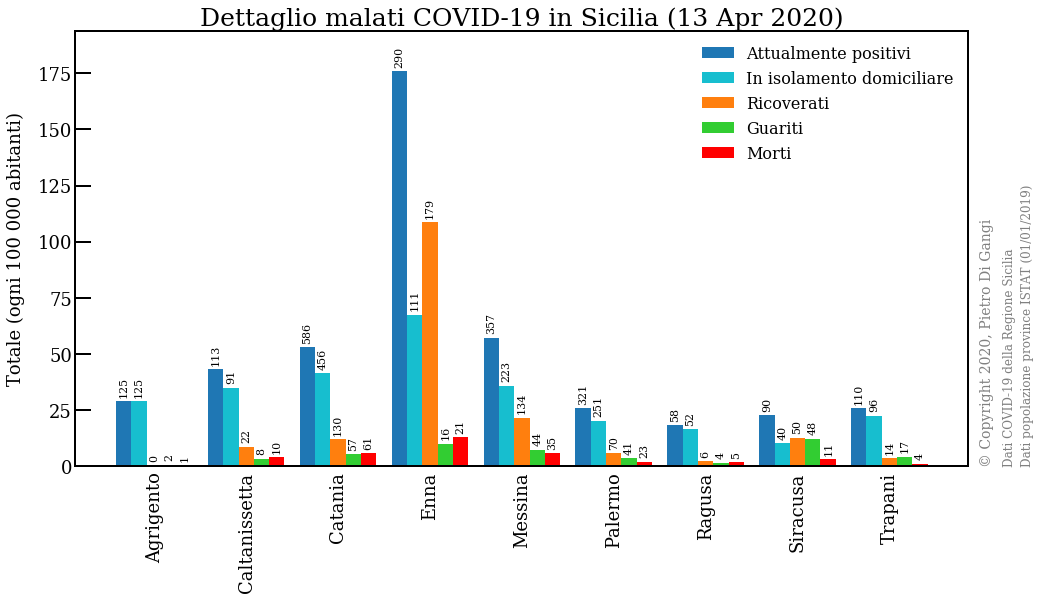

In [450]:
province = prov[prov.region==regione].provincia.unique()
    
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.tick_params(bottom=False) 

total_width=1.5
single_width=1.
colors = ['tab:blue', 'tab:cyan', 'tab:orange', 'limegreen', 'r']
df = currentdata[['Attualmente positivi per100k', 'In isolamento domiciliare per100k', 
                    'Ricoverati per100k','Guariti per100k','Morti per100k']]
df = df.rename(columns={
    'Attualmente positivi per100k': 'Attualmente positivi',
    'In isolamento domiciliare per100k': 'In isolamento domiciliare',
    'Ricoverati per100k' : 'Ricoverati',
    'Guariti per100k' : 'Guariti',
    'Morti per100k': 'Morti',
})


# Number of bars per group
n_bars = len(df)

# The width of a single bar
bar_width = total_width / n_bars

# List containing handles for the drawn bars, used for the legend
bars = []


# Iterate over all data
for i, (name, values) in enumerate(df.items()):
    # The offset in x direction of that bar
    x_offset = (i - n_bars / 2) * bar_width + bar_width / 2
    # Draw a bar for every value of that type
    for x, y in enumerate(values):
        bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])
        df_ = currentdata[currentdata['provincia'] == currentdata['provincia'].iat[x]]
        ax.text(x + x_offset, y+2, df_[name].iat[0], fontsize=11, rotation=90, va='bottom', ha='center')
    # Add a handle to the last drawn bar, which we'll need for the legend
    bars.append(bar[0])
    

plt.ylabel('Totale (ogni 100 000 abitanti)')    
ax.set_xticks(np.arange(-0.33,8))
labels = currentdata.provincia
ax.set_xticklabels(labels)
plt.xticks(rotation=90)

# Draw legend if we need
ax.legend(bars, df.keys(), frameon=False)

ax.set_ylim(0,ax.get_ylim()[1]*1.05)
plt.title('Dettaglio malati COVID-19 in Sicilia (%s)' % lastday.strftime('%-d %b %Y'), fontsize=25)

# disclaimer
dayspan = prov.date.iat[-1] - prov.date.iat[0]
text = '© Copyright 2020, Pietro Di Gangi'
plt.text(8.65, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
text = 'Dati COVID-19 della Regione Sicilia'
plt.text(8.9, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
text = 'Dati popolazione province ISTAT (01/01/2019)'
plt.text(9.1, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)

plt.show()

fig.savefig('figure/%s-covid19-sicilia-malati.png' % lastday.strftime('%Y-%m-%d'))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.


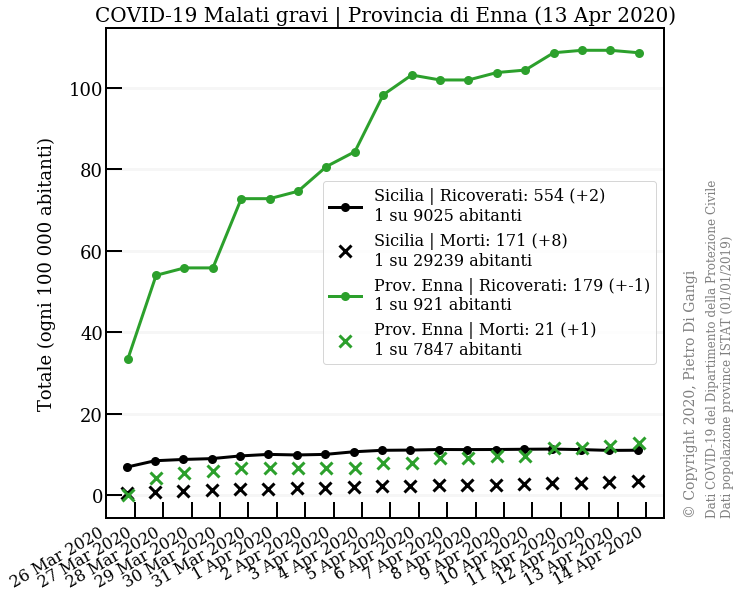

In [451]:
def malati_enna(provincia, title=''):

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
   
    
    
    df = ita[ita.region=='Sicilia']
    df = df[df.date > datetime.date(2020,3,26)]
    pop = df.population.iat[0]
    if df.new_ricoverati_con_sintomi.iat[-1]<0: sign=''
    else: sign='+'
    ax.plot(df.date, df.ricoverati_con_sintomi_per100k, lw=3, color='k', marker='.', label='Sicilia | Ricoverati: %d (%s%d)\n1 su %.f abitanti' % (df.ricoverati_con_sintomi.iat[-1],sign,df.new_ricoverati_con_sintomi.iat[-1],pop/df.ricoverati_con_sintomi.iat[-1]))
    #ax.bar(df.date, df.ricoverati_con_sintomi_per100k, lw=3, color='k', label='Sicilia | Ricoverati: %d (%s%d)\n1 su %.f abitanti' % (df.ricoverati_con_sintomi.iat[-1],sign,df.new_ricoverati_con_sintomi.iat[-1],pop/df.ricoverati_con_sintomi.iat[-1]))

    if df.new_deaths.iat[-1]<0: sign=''
    else: sign='+'
    ax.plot(df.date, df.deaths_per100k, lw=0, color='k', marker='x', label='Sicilia | Morti: %d (%s%d)\n1 su %.f abitanti' % (df.deaths.iat[-1],sign,df.new_deaths.iat[-1],pop/df.deaths.iat[-1]))
    #ax.bar(df.date, df.deaths_per100k, lw=0, color='grey', label='Sicilia | Morti: %d (%s%d)\n1 su %.f abitanti' % (df.deaths.iat[-1],sign,df.new_deaths.iat[-1],pop/df.deaths.iat[-1]))
    
    df = data[data.provincia==provincia]
    df = df[df.date > datetime.date(2020,3,26)]
    pop = df.population.iat[0]
    var = 'Ricoverati per100k'
    if df[var].iat[-1]<0: sign=''
    else: sign='+'
    ax.plot(df.date, df[var], color=cs[provincia], lw=3, marker='.', label='Prov. Enna | Ricoverati: %d (%s%d)\n1 su %.f abitanti' % (df['Ricoverati'].iat[-1],sign,df['new_Ricoverati'].iat[-1],pop/df.Ricoverati.iat[-1]))       
    #ax.bar(df.date, df[var], color=cs[provincia], lw=3, label='Prov. Enna | Ricoverati: %d (%s%d)\n1 su %.f abitanti' % (df['Ricoverati'].iat[-1],sign,df['new_Ricoverati'].iat[-1],pop/df.Ricoverati.iat[-1]))       

    var = 'Morti per100k'
    if df['new_'+var].iat[-1]<0: sign=''
    else: sign='+'
    ax.plot(df.date, df[var], ls='--', color=cs[provincia], lw=0, marker='x', label='Prov. Enna | Morti: %d (%s%d)\n1 su %.f abitanti' % (df['Morti'].iat[-1],sign,df['new_Morti'].iat[-1],pop/df.Morti.iat[-1]))
    #ax.bar(df.date, df[var], ls='--', color=cs[provincia], lw=0, label='Prov. Enna | Morti: %d (%s%d)\n1 su %.f abitanti' % (df['Morti'].iat[-1],sign,df['new_Morti'].iat[-1],pop/df.Morti.iat[-1]))

    
    plt.ylabel('Totale (ogni 100 000 abitanti)')
    ax.set_ylim()
    ax.set_xlim(left=datetime.date(2020,3,26))
    ax.tick_params(axis='x', which='major', labelsize=16)
    
    ax.grid(axis='y', linewidth=3, alpha=0.1, which='both')
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b %Y'))
    fig.autofmt_xdate()
    plt.gcf().autofmt_xdate()
    
    #legend
    leg = plt.legend(loc=0, fontsize=16) 
    plt.title(title + ' (%s)' % lastday.strftime('%-d %b %Y'), fontsize=20)
    
    # disclaimer
    xlim = lastday - datetime.datetime(2020,3,26)
    ylim = ax.get_ylim()
    text = '© Copyright 2020, Pietro Di Gangi'
    ax.text(lastday+timedelta(0.1)+0.08*xlim, ylim[0], text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
    text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
    ax.text(lastday+timedelta(0.1)+0.12*xlim, ylim[0], text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
    text = 'Dati popolazione province ISTAT (01/01/2019)'
    plt.text(lastday+timedelta(0.1)+0.15*xlim, ylim[0],  text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)

    plt.show()
    fig.savefig('figure/%s-covid19-enna-malati-gravi.png' % lastday.strftime('%Y-%m-%d'))
    

malati_enna('Enna', 'COVID-19 Malati gravi | Provincia di Enna')